# Libraries

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
import numpy as np
import sklearn.preprocessing
import sklearn.cluster

# Read data

In [2]:
work_dir='/home/ggomarr/Documents/Education/20170623 Udemy - Machine Learning A-Z: Hands-On Python and R in Data Science/' + \
         'Course data/Part 4 - Clustering/Section 24 - K-Means Clustering/'
df=pd.read_csv(work_dir+'Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df=df.drop(['CustomerID'],axis=1)
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [5]:
X=df[['Annual Income (k$)','Spending Score (1-100)']].values
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

# Clean up missing data

In [8]:
sum(X!=X)

array([0, 0])

In [7]:
# imputer=sklearn.preprocessing.Imputer(missing_values='NaN',strategy='mean',axis=0).fit(X[:,1:3])
# X[:,1:3]=imputer.transform(X[:,1:3])
# X

# Create dummy variables

In [8]:
# label_encoder=sklearn.preprocessing.LabelEncoder().fit(X[:,0])
# X[:,0]=label_encoder.transform(X[:,0])
# one_hot_encoder=sklearn.preprocessing.OneHotEncoder(categorical_features=[0]).fit(X)
# X=one_hot_encoder.transform(X).toarray()
# X

# Avoid the dummy variable trap

In [9]:
# X=X=np.delete(X,0,1)
# X

# Create categorical labels

In [10]:
# label_encoder=sklearn.preprocessing.LabelEncoder().fit(Y)
# Y=label_encoder.transform(Y)
# Y

# Feature scaling

In [9]:
X_scaler=sklearn.preprocessing.StandardScaler().fit(X)
X_scaled=X_scaler.transform(X)
X_scaled[:5]
# X_scaler,Y_scaler=sklearn.preprocessing.StandardScaler().fit(X),sklearn.preprocessing.StandardScaler().fit(Y)
# X_scaled,Y_scaled=X_scaler.transform(X),Y_scaler.transform(Y)
# X_scaled,Y_scaled

/home/ggomarr/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

# Train/test split

In [12]:
# X_train,X_test,Y_train,Y_test=sklearn.cross_validation.train_test_split(X_scaled,Y,
#                                                                         test_size=0.25,random_state=0)
# Y_train.size,Y_test.size

(300, 100)

In [13]:
# X_train,Y_train

In [14]:
# X_test,Y_test

# K-Means

In [86]:
num_clusters_lst=range(1,10+1)

===  1 clusters ===

WCSS: 400.00


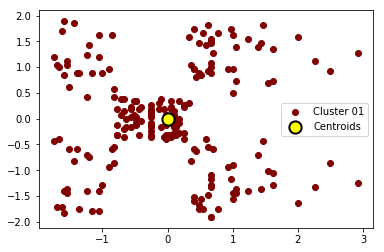

===  2 clusters ===

WCSS: 269.02


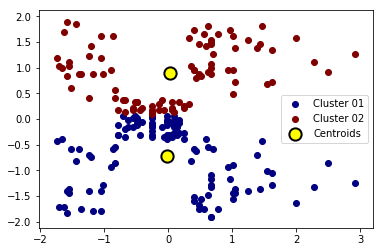

===  3 clusters ===

WCSS: 157.70


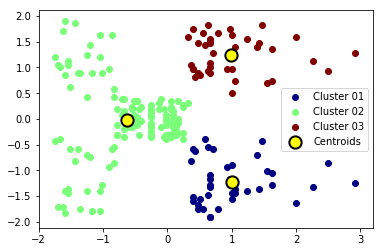

===  4 clusters ===

WCSS: 108.92


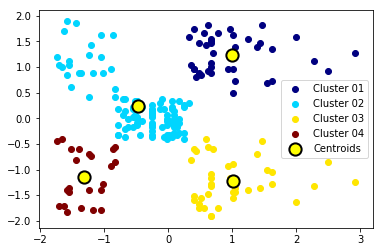

===  5 clusters ===

WCSS: 65.57


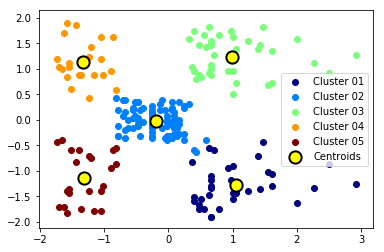

===  6 clusters ===

WCSS: 55.06


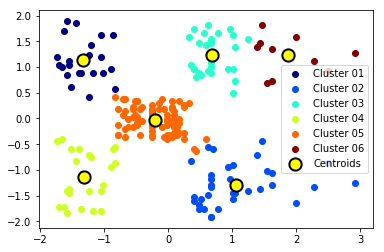

===  7 clusters ===

WCSS: 44.91


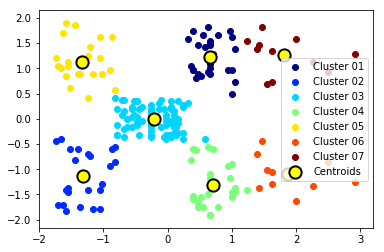

===  8 clusters ===

WCSS: 37.18


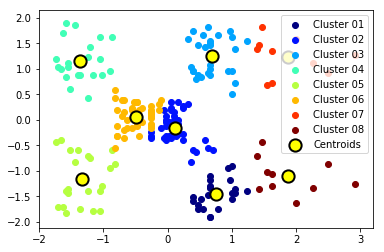

===  9 clusters ===

WCSS: 32.38


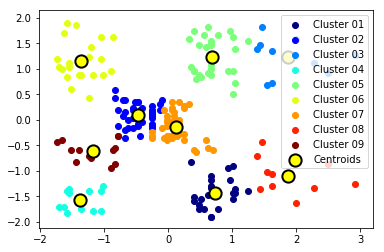

=== 10 clusters ===

WCSS: 29.08


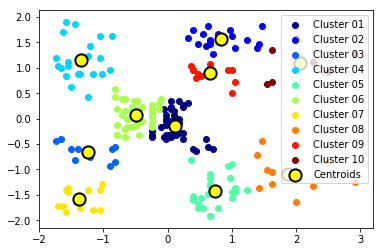

In [93]:
model_lst=[]
for num_clusters in num_clusters_lst:
    print('=== {:2d} clusters ==='.format(num_clusters))
    model=sklearn.cluster.KMeans(n_clusters=num_clusters,init='k-means++',
                                 max_iter=300,n_init=10,random_state=0).fit(X_scaled)
    print('\nWCSS: {:0.2f}'.format(model.inertia_))
    model_lst.append(model)
    cluster=model.predict(X_scaled)
    color_lst=plt.cm.get_cmap('jet',num_clusters)
    for c in range(num_clusters):
        plt.scatter(X_scaled[cluster==c,0],X_scaled[cluster==c,1],
                    color=color_lst(c),label='Cluster {:02d}'.format(c+1))
    plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],
                color='yellow',s=150,edgecolor='black',linewidth=2,label='Centroids')
    plt.legend()
    plt.show()

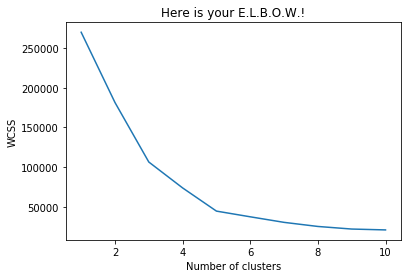

In [25]:
wcss=[model.inertia_ for model in model_lst]
plt.plot(num_clusters_lst,wcss)
plt.title('Here is your E.L.B.O.W.!')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()